In [125]:
import pandas as pd 
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

In [126]:
df = pd.read_csv("./Coffee_dataset_cleaned_column_and_rows.csv", index_col=0) 

In [127]:
df.head()

,ID,Species,Owner,Country.of.Origin,Farm.Name,Company,Region,In.Country.Partner,Harvest.Year,Grading.Date,Owner.1,Variety,Processing.Method,Aroma,Flavor,Aftertaste,Acidity,Body,Balance,Uniformity,Clean.Cup,Sweetness,Total.Cup.Points,Moisture,Color,Certification.Body,altitude_mean_meters
0,1,Arabica,metad plc,Ethiopia,metad plc,metad agricultural developmet plc,guji-hambela,METAD Agricultural Development plc,2014,"April 4th, 2015",metad plc,Other,Washed / Wet,8.67,8.83,8.67,8.75,8.50,8.42,10.0,10.0,10.0,90.58,0.12,Green,METAD Agricultural Development plc,2075.0
1,2,Arabica,metad plc,Ethiopia,metad plc,metad agricultural developmet plc,guji-hambela,METAD Agricultural Development plc,2014,"April 4th, 2015",metad plc,Other,Washed / Wet,8.75,8.67,8.50,8.58,8.42,8.42,10.0,10.0,10.0,89.92,0.12,Green,METAD Agricultural Development plc,2075.0
2,3,Arabica,grounds for health admin,Guatemala,"san marcos barrancas ""san cristobal cuch",NaN,NaN,Specialty Coffee Association,NaN,"May 31st, 2010",Grounds for Health Admin,Bourbon,NaN,8.42,8.50,8.42,8.42,8.33,8.42,10.0,10.0,10.0,89.75,0.00,NaN,Specialty Coffee Association,1700.0
3,4,Arabica,yidnekachew dabessa,Ethiopia,yidnekachew dabessa coffee plantation,yidnekachew debessa coffee plantation,oromia,METAD Agricultural Development plc,2014,"March 26th, 2015",Yidnekachew Dabessa,Other,Natural / Dry,8.17,8.58,8.42,8.42,8.50,8.25,10.0,10.0,10.0,89.00,0.11,Green,METAD Agricultural Development plc,2000.0
4,5,Arabica,metad plc,Ethiopia,metad plc,metad agricultural developmet plc,guji-hambela,METAD Agricultural Development plc,2014,"April 4th, 2015",metad plc,Other,Washed / Wet,8.25,8.50,8.25,8.50,8.42,8.33,10.0,10.0,10.0,88.83,0.12,Green,METAD Agricultural Development plc,2075.0


In [128]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [129]:
numeric_cols =df[['Aroma', 'Aftertaste', 'Acidity', 'Body', 'Sweetness']] #Profile aromatique
scaler = StandardScaler()
features_scaled = scaler.fit_transform(numeric_cols)

In [130]:
features_scaled

array([[ 3.47576628,  3.60788676,  3.78827692,  3.17479655,  0.24538224],
       [ 3.72909318,  3.12241286,  3.25545055,  2.91480265,  0.24538224],
       [ 2.68411971,  2.89395456,  2.75396692,  2.62230952,  0.24538224],
       ...,
       [-0.76745934, -0.67570641, -0.38030581, -0.07512716, -4.41165942],
       [-0.48246658, -1.87511249, -1.163874  , -0.88760809, -5.02537809],
       [-2.60407939, -2.58904469, -2.22952672, -1.96008291, -5.76545061]])

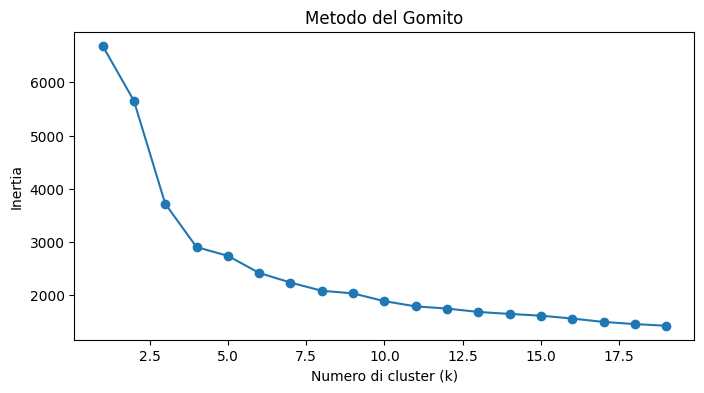

In [131]:
inertia = []
k_range = range(1, 20)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(features_scaled)
    inertia.append(kmeans.inertia_)

# Traccia il grafico del metodo del gomito
plt.figure(figsize=(8, 4))
plt.plot(k_range, inertia, marker='o')
plt.xlabel('Numero di cluster (k)')
plt.ylabel('Inertia')
plt.title('Metodo del Gomito')
plt.show()

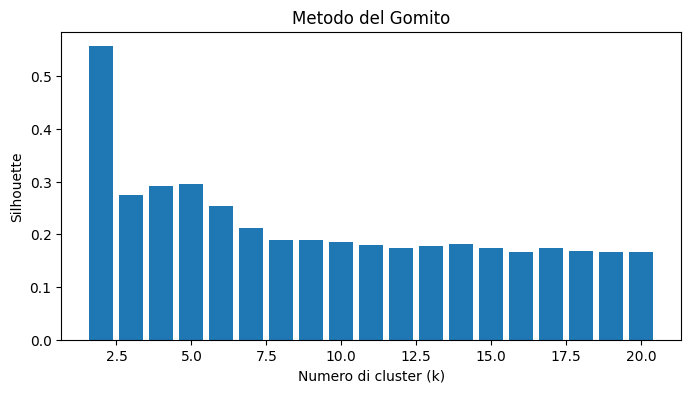

In [132]:
silhouette = []
k_range = range(2, 21)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, init="k-means++")
    kmeans.fit(features_scaled)
    silhouette.append(silhouette_score(features_scaled, kmeans.labels_))

# Traccia il grafico del metodo del gomito
plt.figure(figsize=(8, 4))
plt.bar(k_range, silhouette)
plt.xlabel('Numero di cluster (k)')
plt.ylabel('Silhouette')
plt.title('Metodo del Gomito')
plt.show()

In [133]:
kmeans = KMeans(n_clusters=8, random_state=42)
kmeans.fit(features_scaled)

KMeans(random_state=42)

In [134]:
df['Cluster'] = kmeans.labels_

# Mostra le prime righe del dataset con l'etichetta del cluster
print(df.head())

   ID  Species                     Owner Country.of.Origin  \
0   1  Arabica                 metad plc          Ethiopia   
1   2  Arabica                 metad plc          Ethiopia   
2   3  Arabica  grounds for health admin         Guatemala   
3   4  Arabica       yidnekachew dabessa          Ethiopia   
4   5  Arabica                 metad plc          Ethiopia   

                                  Farm.Name  \
0                                 metad plc   
1                                 metad plc   
2  san marcos barrancas "san cristobal cuch   
3     yidnekachew dabessa coffee plantation   
4                                 metad plc   

                                 Company        Region  \
0      metad agricultural developmet plc  guji-hambela   
1      metad agricultural developmet plc  guji-hambela   
2                                    NaN           NaN   
3  yidnekachew debessa coffee plantation        oromia   
4      metad agricultural developmet plc  guji-hambela

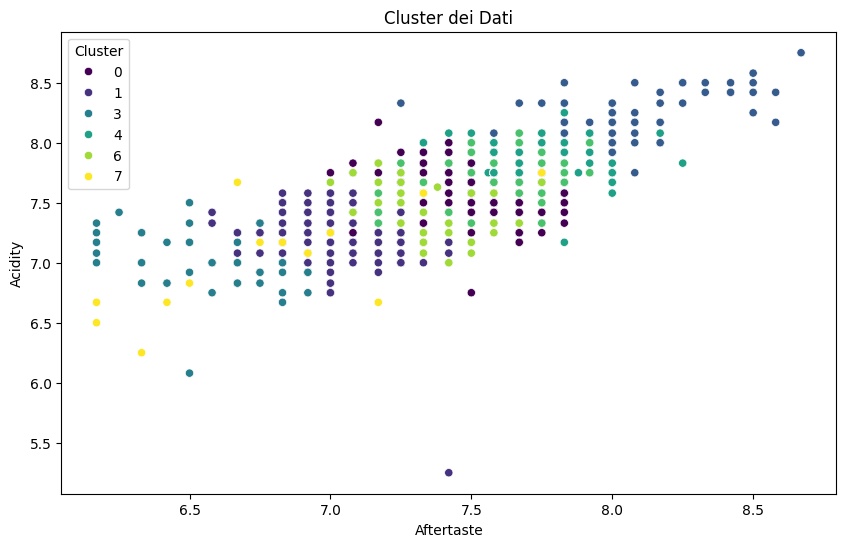

In [135]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Aftertaste', y='Acidity', hue='Cluster', palette='viridis')
plt.title('Cluster dei Dati')
plt.show()

In [136]:
fig = px.scatter_3d(data_frame=df, x='Aroma', y='Acidity', z='Sweetness', color='Cluster')
fig.show()

In [137]:
df["Cluster"].value_counts()

Cluster
0    405
6    308
4    259
1    184
2     74
3     53
5     40
7     15
Name: count, dtype: int64

In [138]:
pca = PCA()

In [139]:
df_pca = pca.fit_transform(features_scaled)
df_pca

array([[ 7.03509456, -0.03448538, -0.13931632,  0.19608961, -0.19178296],
       [ 6.51020626, -0.03292002, -0.38006704, -0.31701969, -0.42546636],
       [ 5.48613426,  0.03137029,  0.03503308, -0.01966517, -0.01605666],
       ...,
       [-1.13383145, -4.3638268 ,  0.5413317 ,  0.19161458,  0.01655825],
       [-2.43305161, -4.96691528, -0.04884265, -0.41710185, -0.61591357],
       [-4.92340226, -5.5680649 ,  0.44730099,  0.28045374,  0.12469148]])

In [140]:
pca.components_

array([[ 0.4899765 ,  0.53096832,  0.5042676 ,  0.47137341,  0.03894835],
       [-0.04681798,  0.00838728, -0.02452072, -0.01704709,  0.99842168],
       [-0.55227725, -0.12247279, -0.09858331,  0.81859291, -0.01331301],
       [-0.58285068,  0.08037926,  0.75443894, -0.2905816 , -0.01443904],
       [-0.3361637 ,  0.83459085, -0.40769614, -0.15160636, -0.03537574]])

In [141]:
pca.explained_variance_

array([2.89003431, 0.99903355, 0.4776558 , 0.38397671, 0.25303934])

In [142]:
pca.explained_variance_ratio_

array([0.57757487, 0.19965738, 0.09545976, 0.07673795, 0.05057004])

In [143]:
df_final = pd.DataFrame(df_pca)


In [144]:
df_final = df_final.dot(pca.components_.T)

In [145]:
df_final = pd.concat([df_final, df["Cluster"]], axis=1)
df_final.head()

,0,1,2,3,4,Cluster
0,3.443429,-0.521065,-3.704294,-4.262498,-2.359870,2
1,2.814707,-0.715142,-3.807785,-3.985598,-1.997905,2
2,2.712505,-0.273142,-3.053047,-3.162699,-1.828791,2
3,3.262186,-0.111807,-2.829864,-2.505196,-2.177570,2
4,3.044124,-0.651681,-2.653439,-2.685585,-2.011296,2


In [146]:
new_names = {0:'PC1', 1:'PC2', 2:'PC3', 3:'PC4', 4:'PC5'}
df_final = df_final.rename(columns=new_names)

In [147]:
fig = px.scatter_3d(data_frame=df_final, x='PC1', y='PC2', z='PC3', color='Cluster', color_continuous_scale='Inferno')
fig.show()

# Predicting user_data

In [148]:
user_row = {'Aroma': 5,
            'Aftertaste': 5, 
            'Acidity': 7,
            'Body': 2,
            'Sweetness': 10}
user_row = pd.DataFrame([user_row])


In [149]:
# numeric_cols = pd.concat([numeric_cols, user_row], ignore_index=True)
# numeric_cols.tail(5)    #to see the last 5 rows

In [150]:
user_row_scaled = scaler.transform(user_row)
user_pred = kmeans.predict(user_row_scaled)
print(f'Your coffee belongs to the cluster n. {user_pred[0]}')

Your coffee belongs to the cluster n. 3


Highlighting cluster

In [151]:
df_pca = df_final # backup

In [152]:
# splitting dataframe based on opcaity

mask_user = df_pca['Cluster']==user_pred[0]
df_user_pca = df_pca[mask_user]
df_rest_pca = df_pca[~mask_user]
df_user_pca.head(5)

,PC1,PC2,PC3,PC4,PC5,Cluster
679,4.065832,3.143518,4.738490,3.727211,-1.573047,3
1159,-0.357259,-0.263484,2.271704,1.560959,0.840464,3
1181,-0.649291,-1.702102,1.099575,2.644766,0.694006,3
1191,0.207840,-0.099176,1.683179,2.728609,0.299112,3
1197,-0.802005,-0.466763,1.479298,4.008055,0.819040,3


In [153]:
color_scale = 'Inferno'
color_range = [df_pca['Cluster'].min(), df_pca['Cluster'].max()]

In [154]:
fig_pca = go.Figure(go.Scatter3d(x=df_user_pca['PC1'], y=df_user_pca['PC2'], z=df_user_pca['PC3'], mode='markers', marker=dict(color=df_user_pca['Cluster'], colorscale=color_scale, cmin=color_range[0], cmax=color_range[1], opacity=1)))
fig_pca.add_trace(go.Scatter3d(x=df_rest_pca['PC1'], y=df_rest_pca['PC2'], z=df_rest_pca['PC3'], mode='markers', marker=dict(color=df_rest_pca['Cluster'], colorscale=color_scale, cmin=color_range[0], cmax=color_range[1],opacity=0.1)))
fig_pca.update_layout(showlegend=False, title='The cluster your coffee belongs to', scene=dict(xaxis_title='PC1', yaxis_title='Pc2', zaxis_title='PC3'))
fig_pca.show()

Returning the list of all coffees from user's cluster

In [155]:
recommend = df['Cluster']==user_pred[0]
df_coffee_reco = df[recommend]
print(df_coffee_reco['Cluster'].unique()[0])
print(df_coffee_reco['Farm.Name'])

3
679                                    NaN
1159                                   NaN
1181                    conquista / morito
1191                               various
1197                                   NaN
1199                               various
1201                                   NaN
1208                         la castellana
1212                         alicia's farm
1213                             los pinos
1214                        los saltarines
1215                                   NaN
1218                    grapos el porvenir
1222                            finca sego
1224                           santa maria
1227                               various
1228                         el sacramento
1230                    conquista / morito
1233                               various
1234                                   NaN
1236                               various
1240                  la union monte verde
1245                    conquista / morito
1247     

In [156]:
df['Total.Cup.Points'].min()

59.83

In [157]:
df['Tasting profile'] = np.nan

In [158]:
'Aroma', 'Aftertaste', 'Acidity', 'Body', 'Sweetness'

('Aroma', 'Aftertaste', 'Acidity', 'Body', 'Sweetness')

In [159]:
df.head(1)

,ID,Species,Owner,Country.of.Origin,Farm.Name,Company,Region,In.Country.Partner,Harvest.Year,Grading.Date,Owner.1,Variety,Processing.Method,Aroma,Flavor,Aftertaste,Acidity,Body,Balance,Uniformity,Clean.Cup,Sweetness,Total.Cup.Points,Moisture,Color,Certification.Body,altitude_mean_meters,Cluster,Tasting profile
0,1,Arabica,metad plc,Ethiopia,metad plc,metad agricultural developmet plc,guji-hambela,METAD Agricultural Development plc,2014,"April 4th, 2015",metad plc,Other,Washed / Wet,8.67,8.83,8.67,8.75,8.5,8.42,10.0,10.0,10.0,90.58,0.12,Green,METAD Agricultural Development plc,2075.0,2,NaN


In [160]:
df['Tasting profile'] = df.apply(lambda x: [x['Aroma'], x['Aftertaste'], x['Acidity'], x['Body'], x['Sweetness']], axis=1)

In [161]:
df.head()

,ID,Species,Owner,Country.of.Origin,Farm.Name,Company,Region,In.Country.Partner,Harvest.Year,Grading.Date,Owner.1,Variety,Processing.Method,Aroma,Flavor,Aftertaste,Acidity,Body,Balance,Uniformity,Clean.Cup,Sweetness,Total.Cup.Points,Moisture,Color,Certification.Body,altitude_mean_meters,Cluster,Tasting profile
0,1,Arabica,metad plc,Ethiopia,metad plc,metad agricultural developmet plc,guji-hambela,METAD Agricultural Development plc,2014,"April 4th, 2015",metad plc,Other,Washed / Wet,8.67,8.83,8.67,8.75,8.50,8.42,10.0,10.0,10.0,90.58,0.12,Green,METAD Agricultural Development plc,2075.0,2,"[8.67, 8.67, 8.75, 8.5, 10.0]"
1,2,Arabica,metad plc,Ethiopia,metad plc,metad agricultural developmet plc,guji-hambela,METAD Agricultural Development plc,2014,"April 4th, 2015",metad plc,Other,Washed / Wet,8.75,8.67,8.50,8.58,8.42,8.42,10.0,10.0,10.0,89.92,0.12,Green,METAD Agricultural Development plc,2075.0,2,"[8.75, 8.5, 8.58, 8.42, 10.0]"
2,3,Arabica,grounds for health admin,Guatemala,"san marcos barrancas ""san cristobal cuch",NaN,NaN,Specialty Coffee Association,NaN,"May 31st, 2010",Grounds for Health Admin,Bourbon,NaN,8.42,8.50,8.42,8.42,8.33,8.42,10.0,10.0,10.0,89.75,0.00,NaN,Specialty Coffee Association,1700.0,2,"[8.42, 8.42, 8.42, 8.33, 10.0]"
3,4,Arabica,yidnekachew dabessa,Ethiopia,yidnekachew dabessa coffee plantation,yidnekachew debessa coffee plantation,oromia,METAD Agricultural Development plc,2014,"March 26th, 2015",Yidnekachew Dabessa,Other,Natural / Dry,8.17,8.58,8.42,8.42,8.50,8.25,10.0,10.0,10.0,89.00,0.11,Green,METAD Agricultural Development plc,2000.0,2,"[8.17, 8.42, 8.42, 8.5, 10.0]"
4,5,Arabica,metad plc,Ethiopia,metad plc,metad agricultural developmet plc,guji-hambela,METAD Agricultural Development plc,2014,"April 4th, 2015",metad plc,Other,Washed / Wet,8.25,8.50,8.25,8.50,8.42,8.33,10.0,10.0,10.0,88.83,0.12,Green,METAD Agricultural Development plc,2075.0,2,"[8.25, 8.25, 8.5, 8.42, 10.0]"


In [162]:
df['Tasting profile'].apply(min)

0       8.50
1       8.42
2       8.33
3       8.17
4       8.25
5       8.25
6       8.25
7       8.25
8       8.33
9       7.67
10      7.75
11      8.08
12      8.00
13      8.08
14      8.25
15      8.00
16      7.75
17      8.17
18      7.92
19      8.00
20      8.00
21      8.00
22      7.83
23      7.83
24      7.92
25      8.00
26      7.83
27      7.83
28      8.00
29      8.00
30      7.92
31      7.58
32      7.75
33      7.83
34      7.92
35      7.92
36      7.92
37      7.67
38      7.92
39      7.67
40      7.58
41      7.75
42      7.75
43      7.75
44      7.83
45      7.75
46      7.83
47      7.75
48      7.50
49      7.83
50      7.75
51      7.75
52      7.92
53      7.83
54      7.83
55      7.83
56      7.83
57      7.83
58      7.83
59      7.83
60      7.92
61      7.83
62      7.75
63      7.75
64      7.75
65      7.67
66      7.83
67      7.83
68      7.67
69      7.67
70      7.75
71      7.67
72      7.75
73      7.67
74      7.83
75      7.83
76      7.67

In [163]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1338 entries, 0 to 1337
Data columns (total 29 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ID                    1338 non-null   int64  
 1   Species               1338 non-null   object 
 2   Owner                 1331 non-null   object 
 3   Country.of.Origin     1337 non-null   object 
 4   Farm.Name             979 non-null    object 
 5   Company               1129 non-null   object 
 6   Region                1279 non-null   object 
 7   In.Country.Partner    1338 non-null   object 
 8   Harvest.Year          1291 non-null   object 
 9   Grading.Date          1338 non-null   object 
 10  Owner.1               1331 non-null   object 
 11  Variety               1338 non-null   object 
 12  Processing.Method     1169 non-null   object 
 13  Aroma                 1338 non-null   float64
 14  Flavor                1338 non-null   float64
 15  Aftertaste            1338

In [164]:
df['Variety'] = df['Variety'].fillna('Other')

In [165]:
df.head()

,ID,Species,Owner,Country.of.Origin,Farm.Name,Company,Region,In.Country.Partner,Harvest.Year,Grading.Date,Owner.1,Variety,Processing.Method,Aroma,Flavor,Aftertaste,Acidity,Body,Balance,Uniformity,Clean.Cup,Sweetness,Total.Cup.Points,Moisture,Color,Certification.Body,altitude_mean_meters,Cluster,Tasting profile
0,1,Arabica,metad plc,Ethiopia,metad plc,metad agricultural developmet plc,guji-hambela,METAD Agricultural Development plc,2014,"April 4th, 2015",metad plc,Other,Washed / Wet,8.67,8.83,8.67,8.75,8.50,8.42,10.0,10.0,10.0,90.58,0.12,Green,METAD Agricultural Development plc,2075.0,2,"[8.67, 8.67, 8.75, 8.5, 10.0]"
1,2,Arabica,metad plc,Ethiopia,metad plc,metad agricultural developmet plc,guji-hambela,METAD Agricultural Development plc,2014,"April 4th, 2015",metad plc,Other,Washed / Wet,8.75,8.67,8.50,8.58,8.42,8.42,10.0,10.0,10.0,89.92,0.12,Green,METAD Agricultural Development plc,2075.0,2,"[8.75, 8.5, 8.58, 8.42, 10.0]"
2,3,Arabica,grounds for health admin,Guatemala,"san marcos barrancas ""san cristobal cuch",NaN,NaN,Specialty Coffee Association,NaN,"May 31st, 2010",Grounds for Health Admin,Bourbon,NaN,8.42,8.50,8.42,8.42,8.33,8.42,10.0,10.0,10.0,89.75,0.00,NaN,Specialty Coffee Association,1700.0,2,"[8.42, 8.42, 8.42, 8.33, 10.0]"
3,4,Arabica,yidnekachew dabessa,Ethiopia,yidnekachew dabessa coffee plantation,yidnekachew debessa coffee plantation,oromia,METAD Agricultural Development plc,2014,"March 26th, 2015",Yidnekachew Dabessa,Other,Natural / Dry,8.17,8.58,8.42,8.42,8.50,8.25,10.0,10.0,10.0,89.00,0.11,Green,METAD Agricultural Development plc,2000.0,2,"[8.17, 8.42, 8.42, 8.5, 10.0]"
4,5,Arabica,metad plc,Ethiopia,metad plc,metad agricultural developmet plc,guji-hambela,METAD Agricultural Development plc,2014,"April 4th, 2015",metad plc,Other,Washed / Wet,8.25,8.50,8.25,8.50,8.42,8.33,10.0,10.0,10.0,88.83,0.12,Green,METAD Agricultural Development plc,2075.0,2,"[8.25, 8.25, 8.5, 8.42, 10.0]"


In [166]:
variety_dropdown = df_coffee_reco['Variety'].unique().tolist()
variety_dropdown

['Caturra',
 'Other',
 'Bourbon',
 'Typica',
 'Pacas',
 'Mundo Novo',
 'Catuai',
 'Java']